In [5]:
from CEseek_class import *

# visualization settings required to see plots in jupyter notebook
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

wd = '/ocean/projects/cis240075p/skeshari/igvf/bcell2/male_donor/'
out_path = os.path.join(wd, 'out_data', 'comb_ctrl')
os.makedirs(f"{out_path}/figures", exist_ok=True)
os.makedirs(f"{out_path}/out_files", exist_ok=True)


In [32]:
tf_of_interest

['XBP1', 'TCF4', 'BACH2', 'CREB3L2', 'BCL11A']

In [33]:
# slide_enriched_tfs = pd.read_csv("/ocean/projects/cis240075p/skeshari/igvf/bcell2/male_donor/out_data/comb_ctrl/out_files/SLIDE_LF_enriched_double_TFs_('GC-1', 'PB-2').csv", header=0)
# # created dataframe for code compatibility with Jingyu's code   
# tf_of_interest = pd.DataFrame(pd.concat([slide_enriched_tfs['TF1_jid'], slide_enriched_tfs['TF2_jid']]).unique())
# # Directory containing the text files with JASPAR motifs
with open(f"{out_path}/out_files/moi.pkl", 'rb') as f:
    moi = pickle.load(f)
tf_of_interest = []
for motifs in moi:
    tf_of_interest.append(motifs[0])
    tf_of_interest.append(motifs[1])

tf_of_interest = list(set(tf_of_interest))

search_directory = os.path.join(wd, 'out_data', 'out_other_methods', 'JASPAR2024_CORE_vertebrates_non-redundant_homer')
output_file = f"{out_path}/out_files/concatenated_file.txt"
relevant_files = []
motif_name_list = []
for file in os.listdir(search_directory):
    # Check if any TF_id is part of the filename
    for tf_id in tf_of_interest:
        if str.lower(tf_id) in str.lower(file):
            relevant_files.append(os.path.join(search_directory, file))  # Append the full file path
            break  # Break the loop to avoid adding the same file multiple times

# Concatenate all relevant files into a single output file
with open(output_file, 'w') as outfile:
    for file in relevant_files:
        with open(file, 'r') as infile:
            outfile.write(infile.read())
            # outfile.write("\n")  # Add a newline between files for separation
print(f"Concatenated {len(relevant_files)} files into {output_file}")

# Get the list of motif_names as in JASPAR
with open(output_file, 'r') as infile:
    for line in infile:
        if line.startswith('>'):
            motif_name_list.append(line.strip().split('\t')[1])

# Updating the TF names in slide_enriched_tfs
mapping_dict = {key.split('(')[1].split(')')[0]: key for key in motif_name_list}


Concatenated 6 files into /ocean/projects/cis240075p/skeshari/igvf/bcell2/male_donor/out_data/comb_ctrl/out_files/concatenated_file.txt


In [34]:
#increase memory
CEseek_obj = CEseek(output_file)
CEseek_obj.load_sequences(f"{wd}/in_data_required/cell_ranger_output_aggr/atac_peaks.bed",
                         genome_sequence_fa="/ocean/projects/cis240075p/skeshari/utils_data/genomes/GRCh38.p14.genome.fa", 
                         fasta_input=False, out_seq_len=300)

CEseek_obj.sequences_control=[get_random_seq(300) for _ in range(10*len(CEseek_obj.sequences))]
save_path = os.path.join(out_path, 'out_files/CEseek_obj_pre_motif_scan.pkl')
with open(save_path, 'wb') as f:
    pickle.dump(CEseek_obj, f)
print(f"CEseek_obj saved to {save_path}")

CEseek_obj saved to /ocean/projects/cis240075p/skeshari/igvf/bcell2/male_donor/out_data/comb_ctrl/out_files/CEseek_obj_pre_motif_scan.pkl


In [35]:
CEseek_obj.scan_motifs(num_threads=os.cpu_count())

In [36]:
save_path = os.path.join(out_path, 'out_files/CEseek_obj_post_motif_scan.pkl')
with open(save_path, 'wb') as f:
    pickle.dump(CEseek_obj, f)
print(f"CEseek_obj saved to {save_path}")


CEseek_obj saved to /ocean/projects/cis240075p/skeshari/igvf/bcell2/male_donor/out_data/comb_ctrl/out_files/CEseek_obj_post_motif_scan.pkl


In [37]:
moi, list(CEseek_obj.dict_motif.keys())

([('CREB3L2', 'BCL11A', 'SEL1L3'),
  ('CREB3L2', 'XBP1', 'JCHAIN'),
  ('BCL11A', 'CREB3L2', 'SEL1L3'),
  ('TCF4', 'BACH2', 'MZB1'),
  ('CREB3L2', 'BACH2', 'JCHAIN')],
 ['TCF4(MA0830.3)',
  'XBP1(MA0844.2)',
  'Creb3l2(MA0608.1)',
  'BACH2(MA1470.2)',
  'BACH2(MA1101.3)',
  'BCL11A(MA2324.1)'])

In [21]:
list(CEseek_obj.dict_motif.keys())

odict_keys(['TCF4(MA0830.3)', 'PRDM1(MA0508.4)', 'PAX5(MA0014.4)', 'TFEB(MA0692.2)', 'NR6A1(MA1541.2)', 'Runx1(MA0002.3)', 'EBF1(MA0154.5)', 'NFKB1(MA0105.4)', 'BCL6(MA0463.3)', 'Nrf1(MA0506.3)', 'JUNB(MA1140.3)', 'XBP1(MA0844.2)', 'TFEC(MA0871.3)', 'PBX3(MA1114.2)', 'IKZF1(MA1508.2)', 'Creb3l2(MA0608.1)', 'MEF2A(MA0052.5)', 'RREB1(MA0073.2)', 'IRF4(MA1419.2)', 'TCFL5(MA0632.3)', 'SP3(MA0746.3)', 'STAT1(MA0137.4)', 'Plagl1(MA1615.2)', 'SOX4(MA0867.3)', 'BATF3(MA0835.3)', 'POU3F1(MA0786.2)', 'RFX3(MA0798.3)', 'BACH2(MA1470.2)', 'JUN(MA0488.2)', 'ESR1(MA0112.4)', 'ZBTB7A(MA0750.3)', 'ZNF652(MA1657.2)', 'FOSL1(MA0477.3)', 'SMAD3(MA0795.1)', 'Foxo1(MA0480.3)', 'MEF2C(MA0497.2)', 'IRF8(MA0652.2)', 'FLI1(MA0475.3)', 'KLF4(MA0039.5)', 'KLF2(MA1515.2)', 'Stat4(MA0518.2)', 'BHLHE22(MA0818.2)', 'BHLHE41(MA0636.1)', 'PLAG1(MA0163.1)', 'Nfatc2(MA0152.3)', 'EGR1(MA0162.5)', 'REL(MA0101.1)', 'TGIF1(MA0796.1)', 'Tcf12(MA0521.3)', 'RUNX2(MA0511.2)', 'BCL11A(MA2324.1)'])

In [51]:
#scan orientiaion and spacing
# Creb3l2(MA0608.1)
# BACH2(MA1470.2)
# BCL11A(MA2324.1)
# XBP1(MA0844.2)
# TCF4(MA0830.3)

preferred_motif_set_name=('Creb3l2(MA0608.1)', 'BCL11A(MA2324.1)')

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, '+-+'),
  Text(0, 1.5, '+--'),
  Text(0, 2.5, '--+'),
  Text(0, 3.5, '---')])

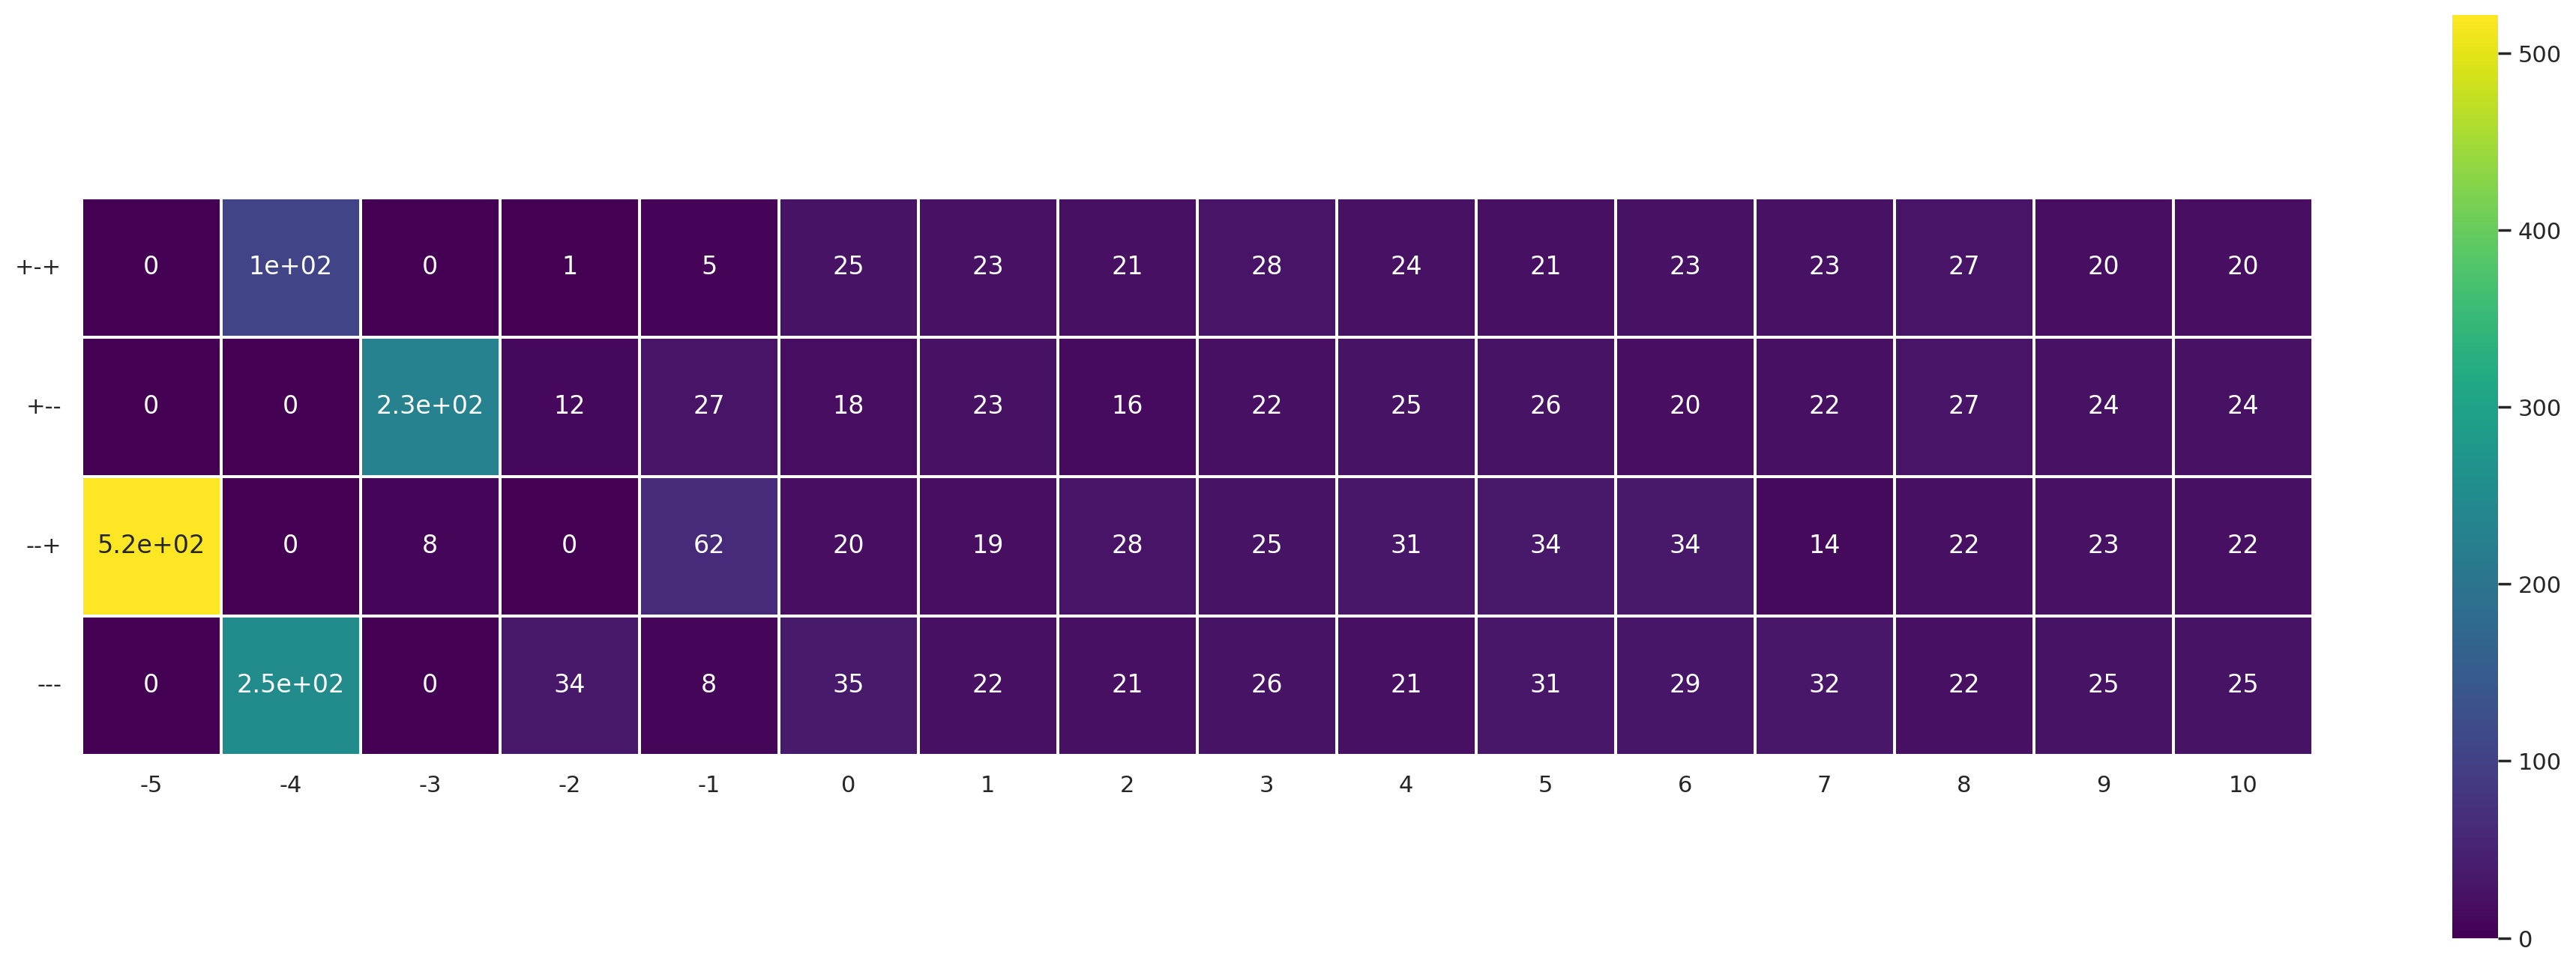

In [52]:
dict_temp =CEseek_obj.count_CE_configuration_for_motif_pair(*preferred_motif_set_name)
fig=plt.figure(figsize=(24,8) , 
#                dpi= 300, 
               facecolor='w', edgecolor='k')
# df_plot=pd.DataFrame(dict_temp[list(dict_temp.keys())[0]]).sort_index().T.applymap(lambda x: -np.log10(x))

df_plot=pd.DataFrame(dict_temp[list(dict_temp.keys())[0]]).sort_index().T

fig = sns.heatmap(df_plot, 
#                    center=0, 
#                    cmap="vlag",
                   cmap="viridis",
#                    vmin=-1,
                   annot=True,
                square=True,
                   linewidths=.75, )

fig.set(xlabel="", ylabel="")
# fig.xaxis.tick_top()
fig.tick_params(top=False)
sns.set(font_scale=1)
plt.yticks(rotation=0) 



(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, '+-+'),
  Text(0, 1.5, '+--'),
  Text(0, 2.5, '--+'),
  Text(0, 3.5, '---')])

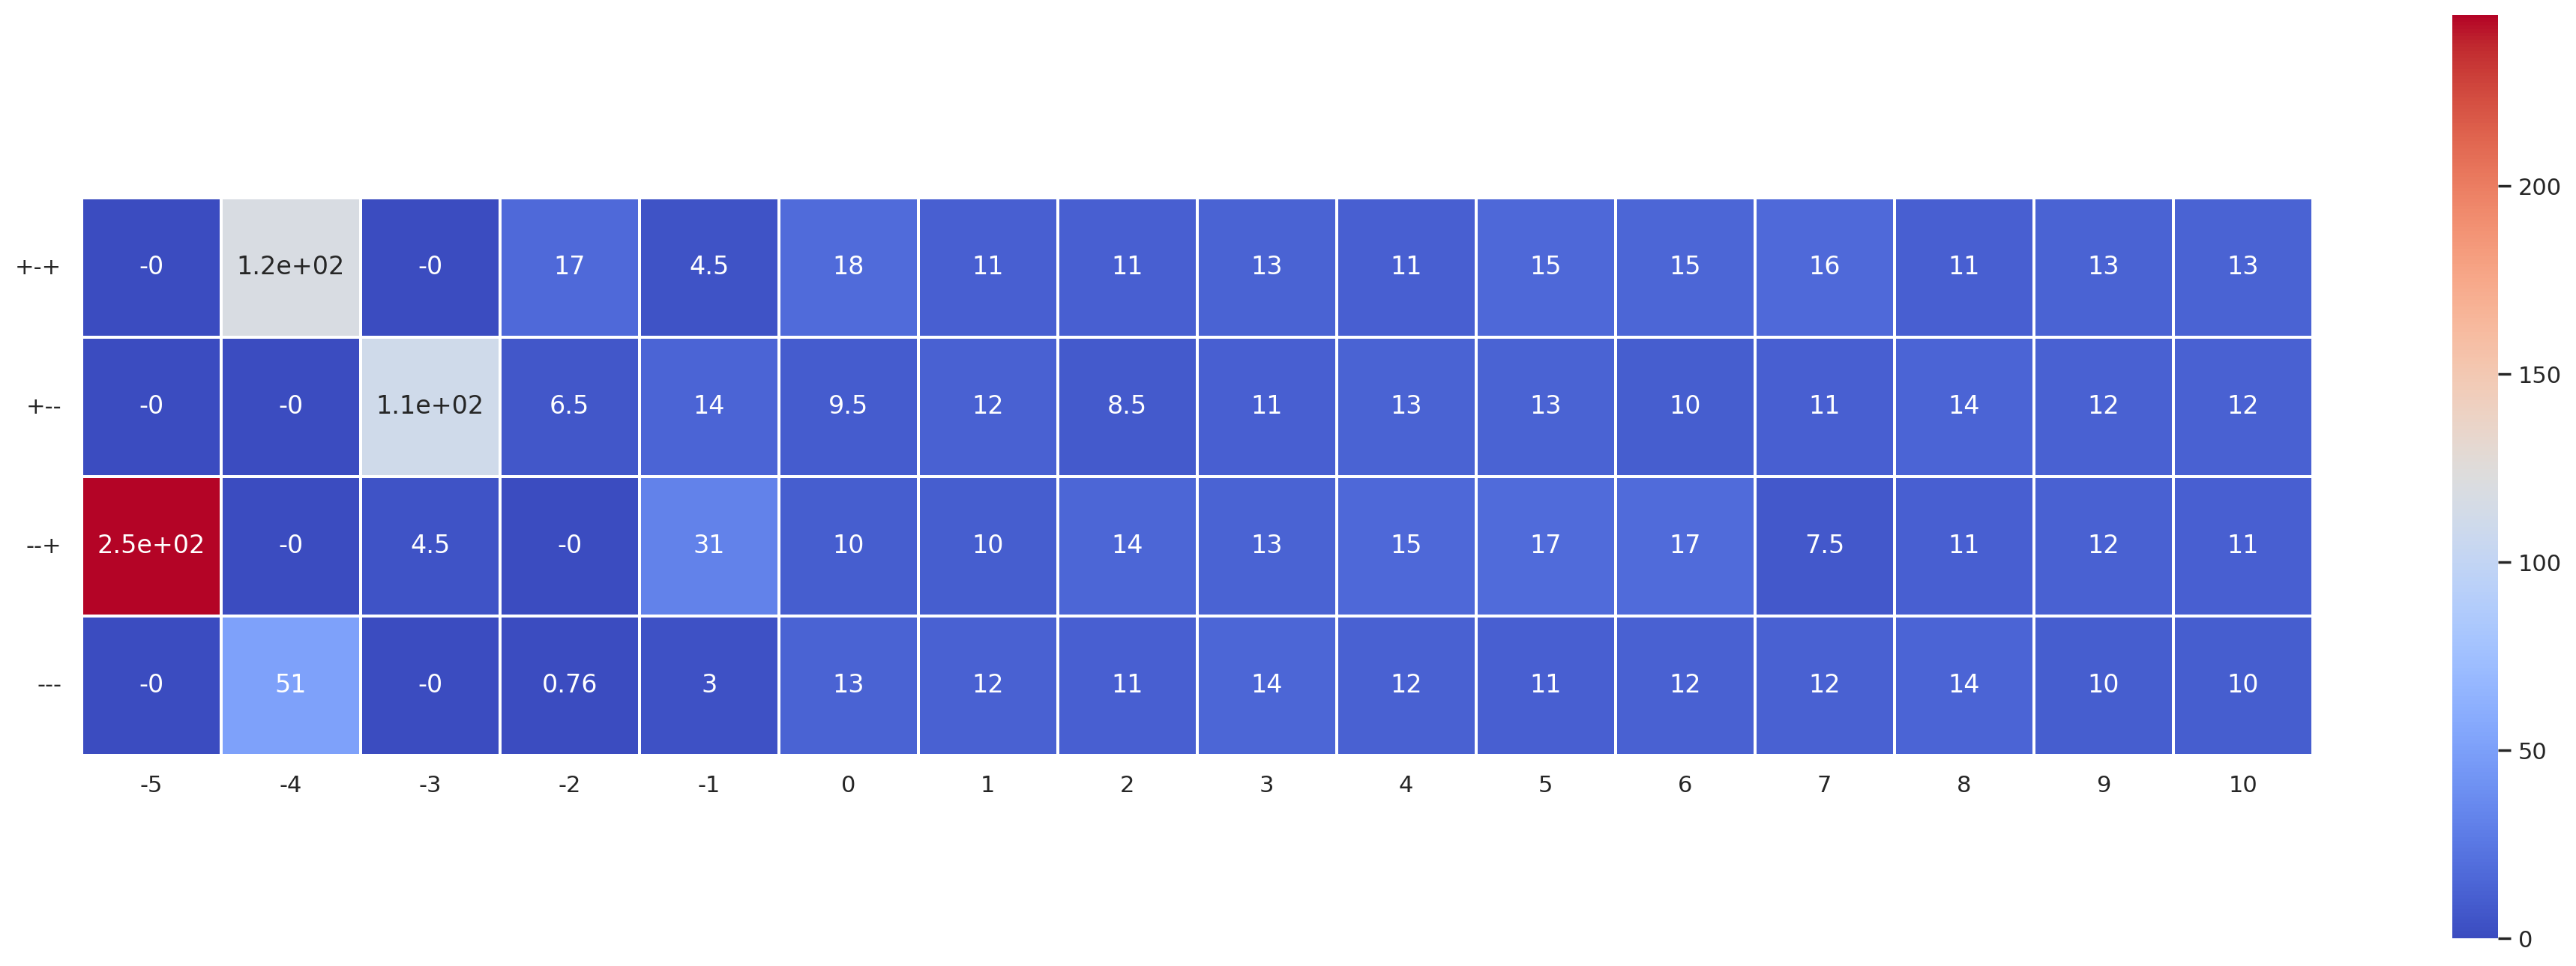

In [53]:
dict_temp=OrderedDict()
dict_temp[preferred_motif_set_name] = OrderedDict()
for strand1 in ["+", "-"]:
    for strand2 in ["+", "-"]:
        key = (strand1, strand2)
        dict_temp[preferred_motif_set_name][key] = {}
for strand1 in ["+", "-"]:
    for strand2 in ["+", "-"]:
        for spacing in range(-5,10+1):
            key = (strand1, strand2)
            p_value=CEseek_obj.motif_enrichment(*preferred_motif_set_name, strand1=strand1, strand2=strand2, spacing=spacing)
            dict_temp[preferred_motif_set_name][key][spacing] = -np.log10(p_value)
df_plot=pd.DataFrame(dict_temp[preferred_motif_set_name]).sort_index().T


fig=plt.figure(figsize=(24,8) , 
#                dpi= 300, 
               facecolor='w', edgecolor='k')

fig = sns.heatmap(df_plot,
#                    center=0,
#                    cmap="vlag",
                   cmap="coolwarm",
#                    vmin=-1,
                   annot=True,
                square=True,
                   linewidths=.75, )
fig.set(xlabel="", ylabel="")
# fig.xaxis.tick_top()
fig.tick_params(top=False)
#         sns.set(font_scale=2)
plt.yticks(rotation=0)



In [ ]:
#scan orientiaion and spacing

ce_name = "prdm1_irf"

preferred_motif_set_name=('Nfatc1(MA0624.3)', 'JUN(MA0488.2)')

dict_temp =CEseek_obj.count_CE_configuration_for_motif_pair(*preferred_motif_set_name)

fig=plt.figure(figsize=(24,8) , 
#                dpi= 300, 
               facecolor='w', edgecolor='k')
# df_plot=pd.DataFrame(dict_temp[list(dict_temp.keys())[0]]).sort_index().T.applymap(lambda x: -np.log10(x))

df_plot=pd.DataFrame(dict_temp[list(dict_temp.keys())[0]]).sort_index().T

fig = sns.heatmap(df_plot, 
#                    center=0, 
#                    cmap="vlag",
                   cmap="viridis",
#                    vmin=-1,
                   annot=True,
                square=True,
                   linewidths=.75, )

fig.set(xlabel="", ylabel="")
# fig.xaxis.tick_top()
fig.tick_params(top=False)
sns.set(font_scale=1)
plt.yticks(rotation=0) 

